In [1]:
# Henrique Cursino Vieira

In [100]:
import re
import glob
import numpy as np
import pandas as pd


# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from nltk.corpus import wordnet

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
import nltk
nltk.download('stopwords')

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/henriquevieira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# TODO: Converter no script anterior para
# gerar o corpora dos documentos de patente

# NAO CARREGAR A PARTIR DE UMA PLANILHA

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
documents = pd.read_csv('patents_data.csv')
documents.head()

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,idx,title_raw,text_raw,title,text,content
0,5969222,\n\n Corn inbred lines for ...,\n An inbred corn line designated A...,corn inbred lines for dairy cattle feed,an inbred corn line designated ar5153bm3 is di...,corn inbred lines for dairy cattle feed an inb...
1,6114609,\n\n Corn inbred lines for ...,\n An inbred corn line designated A...,corn inbred lines for dairy cattle feed,an inbred corn line designated ar5253bm3 is di...,corn inbred lines for dairy cattle feed an inb...
2,5859353,\n\n Corn Inbred lines for ...,\n An inbred corn line designated A...,corn inbred lines for dairy cattle feed,an inbred corn line designated ar5252bm3 is di...,corn inbred lines for dairy cattle feed an inb...
3,5714670,\n\n Soybeans having low li...,\n A novel soybean seed and plant d...,soybeans having low linolenic acid and low pal...,a novel soybean seed and plant designated ax77...,soybeans having low linolenic acid and low pal...
4,5763745,\n\n Soybeans having low li...,\n Methods are described for the pr...,soybeans having low linolenic acid content and...,methods are described for the production of so...,soybeans having low linolenic acid content and...


In [6]:
# TODO: provavelemente remover isso
documents = documents[['idx', 'content']]
documents.head()

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,idx,content
0,5969222,corn inbred lines for dairy cattle feed an inb...
1,6114609,corn inbred lines for dairy cattle feed an inb...
2,5859353,corn inbred lines for dairy cattle feed an inb...
3,5714670,soybeans having low linolenic acid and low pal...
4,5763745,soybeans having low linolenic acid content and...


In [7]:
# Gerando os tokens

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
def sent_to_words(document_content):
    for content in document_content:
        yield(gensim.utils.simple_preprocess(str(content), 
                                             deacc=True))

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
data_words = list(sent_to_words(documents['content']))

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Criando os modelos de bigram e trigam

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
print(trigram_mod[bigram_mod[data_words[0]]])

['corn', 'inbred', 'lines', 'for', 'dairy', 'cattle', 'feed', 'an', 'inbred', 'corn', 'line', 'designated', 'ar', 'bm', 'is', 'disclosed', 'ar', 'bm', 'is', 'useful', 'for', 'producing', 'hybrid', 'corn', 'seed', 'and', 'plants', 'therefrom', 'such', 'corn', 'plants', 'exhibit', 'the', 'brown', 'midrib', 'phenotype', 'and', 'yield', 'silage', 'that', 'when', 'fed', 'to', 'dairy', 'cattle', 'increases', 'milk', 'production']


/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Pre processamento 
# - remocao de stop-words
# - aplicando os modelos de bigram e trigram
# - lemmatizacao das palavras

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
data_words_nostops = remove_stopwords(data_words)
data_words_nostops[0][0:5]

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['corn', 'inbred', 'lines', 'dairy', 'cattle']

In [16]:
data_words_bigrams = make_bigrams(data_words_nostops)
data_words_bigrams[0][0:5]

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['corn', 'inbred', 'lines', 'dairy', 'cattle']

In [17]:
nlp = spacy.load('en', disable=['parser', 'ner'])

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
postags = ['NOUN', 'ADJ', 'VERB', 'ADV']
data_lemmatized = lemmatization(data_words_bigrams, 
                                allowed_postags=postags)
data_lemmatized[0][0:5]

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['corn', 'inbreed', 'line', 'dairy', 'cattle']

In [19]:
# Criacao do dicionario para dados e o corpus

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
id2word = corpora.Dictionary(data_lemmatized)

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
texts = data_lemmatized

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
corpus = [id2word.doc2bow(text) for text in texts]

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# Construcao da modelagem de topicos

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                      id2word = id2word,
                                      num_topics = 20,
                                      random_state = 150,
                                      update_every = 1,
                                      chunksize = 100,
                                      alpha = 'auto',
                                      per_word_topics = True)

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
lda_model.print_topics()

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.036*"composition" + 0.023*"cyanamide" + 0.021*"use" + 0.019*"stabilize" + 0.017*"method" + 0.016*"level" + 0.016*"activity" + 0.016*"reduce" + 0.016*"invention" + 0.016*"cad"'),
 (1,
  '0.029*"composition" + 0.023*"sequence" + 0.021*"calcium" + 0.017*"acid" + 0.017*"stabilize" + 0.017*"amino" + 0.017*"salt" + 0.016*"method" + 0.015*"cyanamide" + 0.014*"gene"'),
 (2,
  '0.068*"soybean" + 0.055*"content" + 0.052*"acid" + 0.047*"less" + 0.046*"percent" + 0.028*"seed" + 0.023*"preferably" + 0.023*"linolenic" + 0.022*"endogenous" + 0.021*"palmitic"'),
 (3,
  '0.060*"plant" + 0.030*"invention" + 0.020*"potato" + 0.019*"event" + 0.018*"induce" + 0.017*"agent" + 0.015*"starch" + 0.015*"soil" + 0.015*"provide" + 0.015*"application"'),
 (4,
  '0.153*"plant" + 0.119*"inbreed" + 0.103*"corn" + 0.050*"seed" + 0.040*"invention" + 0.038*"produce" + 0.034*"relate" + 0.022*"genetic" + 0.018*"method" + 0.015*"provide"'),
 (5,
  '0.023*"plant" + 0.023*"hybrid" + 0.017*"possess" + 0.015*"parent"

In [26]:
lda_model.get_topic_terms(0)

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(60, 0.035657827),
 (191, 0.022740817),
 (88, 0.020993179),
 (213, 0.019355852),
 (65, 0.017147256),
 (40, 0.016265914),
 (112, 0.016248342),
 (51, 0.016225882),
 (62, 0.016211143),
 (244, 0.01621113)]

In [27]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.044298976422564


/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.3826655316915969


In [28]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.287669 -0.007071       1        1  27.535924
19    -0.169744  0.002668       2        1   9.964003
16    -0.198492 -0.035537       3        1   6.946079
17    -0.166179  0.037534       4        1   6.727125
2      0.091812 -0.184359       5        1   6.718125
3     -0.033232  0.063979       6        1   6.404308
15     0.102798 -0.104555       7        1   5.846787
14     0.033588 -0.165525       8        1   5.246852
9     -0.009591  0.045217       9        1   5.238420
10     0.130600 -0.037253      10        1   5.010195
11     0.172925  0.200964      11        1   4.349756
5      0.037553  0.015555      12        1   2.609812
8      0.053146 -0.040047      13        1   2.397604
12    -0.009199  0.085737      14        1   1.648342
0      0.071722  0.079745      15        1   1.558318
1      0.080138  0.037679      16        1   1.457557
6     -0.032099  0.054805      17        1   0.117194
7     -0.059601 -0.033424      18        1   0.079061
18     0.105835 -0.086804      19        1   0.076218
13     0.085691  0.070690      20        1   0.068320, topic_info=            Term        Freq       Total Category  logprob  loglift
9        inbreed  124.000000  124.000000  Default  30.0000  30.0000
2           corn  120.000000  120.000000  Default  29.0000  29.0000
13         plant  224.000000  224.000000  Default  28.0000  28.0000
22          acid   32.000000   32.000000  Default  27.0000  27.0000
62     invention   61.000000   61.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
228         crop    0.003056    4.212953  Topic20  -6.4265   0.0598
227      believe    0.003056    1.433734  Topic20  -6.4265   1.1377
226        apply    0.003056    1.992372  Topic20  -6.4265   0.8086
225  alternative    0.003056    1.443939  Topic20  -6.4265   1.1306
224     adjacent    0.003056    1.444306  Topic20  -6.4265   1.1303

[1002 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
21        5  0.548845   accession
56        8  0.736158  accordance
22        2  0.061206        acid
22        5  0.306030        acid
22        7  0.183618        acid
...     ...       ...         ...
20       14  0.091129       yield
561       4  0.814196         zea
243       9  0.473632        zone
182       3  0.411010        μmol
182       5  0.411010        μmol

[926 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 20, 17, 18, 3, 4, 16, 15, 10, 11, 12, 6, 9, 13, 1, 2, 7, 8, 19, 14])

In [29]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                      id2word = id2word,
                                      num_topics = num_topics,
                                      random_state = 150,
                                      update_every = 1,
                                      chunksize = 100,
                                      alpha = 'auto',
                                      per_word_topics = True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


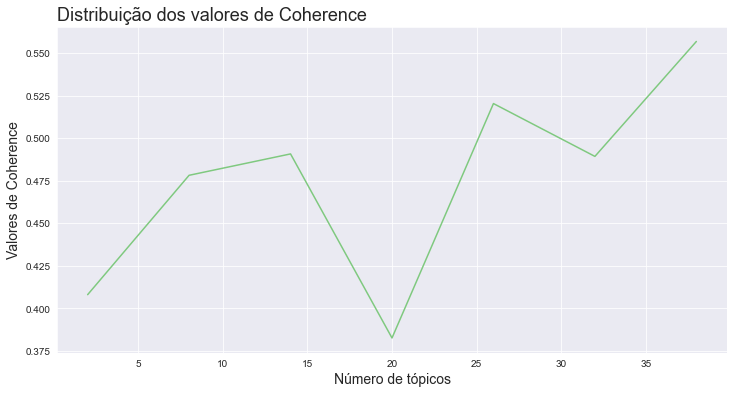

In [31]:
limit=40; start=2; step=6;
x = range(start, limit, step)

sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x, coherence_values)
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição dos valores de Coherence", loc='left', fontsize=18)
ax.set_xlabel("Número de tópicos", fontsize=14)
ax.set_ylabel("Valores de Coherence", fontsize=14)
ax = ax

In [32]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4081
Num Topics = 8  has Coherence Value of 0.4783
Num Topics = 14  has Coherence Value of 0.4909
Num Topics = 20  has Coherence Value of 0.3827
Num Topics = 26  has Coherence Value of 0.5205
Num Topics = 32  has Coherence Value of 0.4894
Num Topics = 38  has Coherence Value of 0.557


/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics())

[(0, '0.036*"composition" + 0.023*"cyanamide" + 0.021*"use" + 0.019*"stabilize" + 0.017*"method" + 0.016*"level" + 0.016*"activity" + 0.016*"reduce" + 0.016*"invention" + 0.016*"cad"'), (1, '0.029*"composition" + 0.023*"sequence" + 0.021*"calcium" + 0.017*"acid" + 0.017*"stabilize" + 0.017*"amino" + 0.017*"salt" + 0.016*"method" + 0.015*"cyanamide" + 0.014*"gene"'), (2, '0.068*"soybean" + 0.055*"content" + 0.052*"acid" + 0.047*"less" + 0.046*"percent" + 0.028*"seed" + 0.023*"preferably" + 0.023*"linolenic" + 0.022*"endogenous" + 0.021*"palmitic"'), (3, '0.060*"plant" + 0.030*"invention" + 0.020*"potato" + 0.019*"event" + 0.018*"induce" + 0.017*"agent" + 0.015*"starch" + 0.015*"soil" + 0.015*"provide" + 0.015*"application"'), (4, '0.153*"plant" + 0.119*"inbreed" + 0.103*"corn" + 0.050*"seed" + 0.040*"invention" + 0.038*"produce" + 0.034*"relate" + 0.022*"genetic" + 0.018*"method" + 0.015*"provide"'), (5, '0.023*"plant" + 0.023*"hybrid" + 0.017*"possess" + 0.015*"parent" + 0.015*"seed" +

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
model_topics

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(13,
  [('corn', 0.0016181228),
   ('plant', 0.0016181228),
   ('group', 0.0016181227),
   ('microelement', 0.0016181227),
   ('upright', 0.0016181227),
   ('well', 0.0016181227),
   ('administer', 0.0016181227),
   ('citric', 0.0016181227),
   ('consist', 0.0016181227),
   ('fertilizer', 0.0016181227)]),
 (8,
  [('acid', 0.032470535),
   ('factor', 0.026926737),
   ('seed', 0.024806036),
   ('soybean', 0.021316895),
   ('plant', 0.020197587),
   ('endogenously', 0.019867107),
   ('concentration', 0.019257924),
   ('say', 0.018089887),
   ('form', 0.018009147),
   ('fatty', 0.016190218)]),
 (6,
  [('corn', 0.0336627),
   ('plant', 0.031126544),
   ('seed', 0.020934047),
   ('fertile', 0.015368956),
   ('cotton', 0.014976494),
   ('cattle', 0.014078211),
   ('recombinant', 0.013211134),
   ('dairy', 0.0125491405),
   ('transgenic', 0.01154219),
   ('provide', 0.011107743)]),
 (1,
  [('composition', 0.029282188),
   ('sequence', 0.022518536),
   ('calcium', 0.020842198),
   ('acid', 0.0

In [35]:
optimal_model.print_topics()

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.036*"composition" + 0.023*"cyanamide" + 0.021*"use" + 0.019*"stabilize" + 0.017*"method" + 0.016*"level" + 0.016*"activity" + 0.016*"reduce" + 0.016*"invention" + 0.016*"cad"'),
 (1,
  '0.029*"composition" + 0.023*"sequence" + 0.021*"calcium" + 0.017*"acid" + 0.017*"stabilize" + 0.017*"amino" + 0.017*"salt" + 0.016*"method" + 0.015*"cyanamide" + 0.014*"gene"'),
 (2,
  '0.068*"soybean" + 0.055*"content" + 0.052*"acid" + 0.047*"less" + 0.046*"percent" + 0.028*"seed" + 0.023*"preferably" + 0.023*"linolenic" + 0.022*"endogenous" + 0.021*"palmitic"'),
 (3,
  '0.060*"plant" + 0.030*"invention" + 0.020*"potato" + 0.019*"event" + 0.018*"induce" + 0.017*"agent" + 0.015*"starch" + 0.015*"soil" + 0.015*"provide" + 0.015*"application"'),
 (4,
  '0.153*"plant" + 0.119*"inbreed" + 0.103*"corn" + 0.050*"seed" + 0.040*"invention" + 0.038*"produce" + 0.034*"relate" + 0.022*"genetic" + 0.018*"method" + 0.015*"provide"'),
 (5,
  '0.023*"plant" + 0.023*"hybrid" + 0.017*"possess" + 0.015*"parent"

In [45]:
optimal_model.get_topic_terms(0)

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(60, 0.035657827),
 (191, 0.022740817),
 (88, 0.020993179),
 (213, 0.019355852),
 (65, 0.017147256),
 (40, 0.016265914),
 (112, 0.016248342),
 (51, 0.016225882),
 (62, 0.016211143),
 (244, 0.01621113)]

In [37]:
c = dict()
for i in range(20):
    for a,b in optimal_model.get_topic_terms(i):
        
        if not a in c.keys():
            c[a] = 1
        else:
            c[a] += 1
        
        

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
print(c)

{60: 3, 191: 2, 88: 2, 213: 2, 65: 6, 40: 1, 112: 2, 51: 2, 62: 7, 244: 1, 457: 3, 186: 1, 22: 7, 445: 2, 455: 1, 275: 1, 52: 5, 29: 3, 39: 3, 48: 3, 16: 11, 49: 2, 42: 3, 33: 1, 47: 2, 13: 13, 235: 2, 596: 1, 129: 2, 142: 1, 138: 2, 164: 2, 50: 3, 143: 2, 9: 5, 2: 7, 14: 6, 81: 4, 276: 3, 8: 3, 298: 1, 325: 1, 331: 2, 320: 1, 127: 2, 36: 2, 350: 1, 344: 1, 1: 1, 559: 1, 3: 1, 428: 1, 433: 1, 389: 1, 34: 1, 343: 1, 395: 1, 35: 1, 10: 1, 419: 1, 75: 3, 20: 2, 87: 1, 382: 1, 70: 1, 490: 1, 24: 1, 55: 2, 106: 1, 110: 1, 46: 1, 512: 1, 522: 1, 90: 1, 514: 1, 96: 1, 103: 1, 102: 1, 228: 1, 240: 1, 229: 1, 230: 1, 415: 1, 417: 1, 409: 1, 410: 1, 411: 1, 412: 1, 413: 1, 414: 1, 11: 1, 63: 2, 489: 2, 460: 1, 279: 2, 442: 1, 68: 1, 66: 1}


/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
len(c.keys())

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


98

In [59]:
optimal_model.get_topic_terms(0)

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(60, 0.035657827),
 (191, 0.022740817),
 (88, 0.020993179),
 (213, 0.019355852),
 (65, 0.017147256),
 (40, 0.016265914),
 (112, 0.016248342),
 (51, 0.016225882),
 (62, 0.016211143),
 (244, 0.01621113)]

In [48]:
# def format_topics_sentences(ldamodel=None, corpus=None, texts=None):
#     # Init output
#     sent_topics_df = pd.DataFrame()

#     # Get main topic in each document
#     for i, row in enumerate(ldamodel[corpus]):
        
#         row = sorted(row, key=lambda x: (x[1]), reverse=True)
#         # Get the Dominant topic, Perc Contribution and Keywords for each document
#         for j, (topic_num, prop_topic) in enumerate(row):
#             print(j, (topic_num, prop_topic))
#             if j == 0:  # => dominant topic
#                 wp = ldamodel.show_topic(topic_num)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#             else:
#                 break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

# # #     Add original text to the end of the output
#     contents = pd.Series(texts)
#     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#     return(sent_topics_df)

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model,
#                                                   corpus=corpus, 
#                                                   texts=data_lemmatized)

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: '<' not supported between instances of 'int' and 'tuple'

In [47]:
# # Group top 5 sentences under each topic
# sent_topics_sorteddf_mallet = pd.DataFrame()

# sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

# for i, grp in sent_topics_outdf_grpd:
#     sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
#                                              grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
#                                             axis=0)

# # Reset Index    
# sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# # Format
# sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# # Show
# sent_topics_sorteddf_mallet.head()

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
optimal_model.show_topics(formatted=False)

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(13,
  [('corn', 0.0016181228),
   ('plant', 0.0016181228),
   ('group', 0.0016181227),
   ('microelement', 0.0016181227),
   ('upright', 0.0016181227),
   ('well', 0.0016181227),
   ('administer', 0.0016181227),
   ('citric', 0.0016181227),
   ('consist', 0.0016181227),
   ('fertilizer', 0.0016181227)]),
 (8,
  [('acid', 0.032470535),
   ('factor', 0.026926737),
   ('seed', 0.024806036),
   ('soybean', 0.021316895),
   ('plant', 0.020197587),
   ('endogenously', 0.019867107),
   ('concentration', 0.019257924),
   ('say', 0.018089887),
   ('form', 0.018009147),
   ('fatty', 0.016190218)]),
 (1,
  [('composition', 0.029282188),
   ('sequence', 0.022518536),
   ('calcium', 0.020842198),
   ('acid', 0.017456785),
   ('stabilize', 0.017343195),
   ('amino', 0.016952937),
   ('salt', 0.016844133),
   ('method', 0.016100451),
   ('cyanamide', 0.014662114),
   ('gene', 0.01368925)]),
 (6,
  [('corn', 0.0336627),
   ('plant', 0.031126544),
   ('seed', 0.020934047),
   ('fertile', 0.015368956)

In [82]:
dictionary_initial = []
for i in range(20):
    terms  = []
    values = []
    for term, value in optimal_model.show_topic(i):
        terms.append(term)
        values.append(value)

    dictionary_initial_tmp = [ ['_'.join(terms[:3]), term] for term in terms]
    dictionary_initial = dictionary_initial + dictionary_initial_tmp

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
dictionary_initial

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['composition_cyanamide_use', 'composition'],
 ['composition_cyanamide_use', 'cyanamide'],
 ['composition_cyanamide_use', 'use'],
 ['composition_cyanamide_use', 'stabilize'],
 ['composition_cyanamide_use', 'method'],
 ['composition_cyanamide_use', 'level'],
 ['composition_cyanamide_use', 'activity'],
 ['composition_cyanamide_use', 'reduce'],
 ['composition_cyanamide_use', 'invention'],
 ['composition_cyanamide_use', 'cad'],
 ['composition_sequence_calcium', 'composition'],
 ['composition_sequence_calcium', 'sequence'],
 ['composition_sequence_calcium', 'calcium'],
 ['composition_sequence_calcium', 'acid'],
 ['composition_sequence_calcium', 'stabilize'],
 ['composition_sequence_calcium', 'amino'],
 ['composition_sequence_calcium', 'salt'],
 ['composition_sequence_calcium', 'method'],
 ['composition_sequence_calcium', 'cyanamide'],
 ['composition_sequence_calcium', 'gene'],
 ['soybean_content_acid', 'soybean'],
 ['soybean_content_acid', 'content'],
 ['soybean_content_acid', 'acid'],
 ['

In [89]:
df_dictionary = pd.DataFrame(dictionary_initial, columns=['topic', 'term'])
df_dictionary.head()

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic,term
0,composition_cyanamide_use,composition
1,composition_cyanamide_use,cyanamide
2,composition_cyanamide_use,use
3,composition_cyanamide_use,stabilize
4,composition_cyanamide_use,method


In [90]:
print(df_dictionary.shape)
df_dictionary = df_dictionary.drop_duplicates()
print(df_dictionary.shape)

(200, 2)
(184, 2)


/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
# Total de topicos
df_dictionary['topic'].unique().shape

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(18,)

In [98]:
# Total de termos unicos
df_dictionary['term'].unique().shape

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(98,)

In [97]:
df_dictionary.head()

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic,term
0,composition_cyanamide_use,composition
1,composition_cyanamide_use,cyanamide
2,composition_cyanamide_use,use
3,composition_cyanamide_use,stabilize
4,composition_cyanamide_use,method


In [139]:
synonyms = []

for term in df_dictionary['term'].tolist():
    
    try:
        synsets = wordnet.synsets(term)[:3]
    except Exception as e:
        print(e)
        
    for synset in synsets:
        for lemma in synset.lemmas():
            synonyms.append([term, lemma.name()])
            
df_synonyms = pd.DataFrame(synonyms, columns=['term', 'feature'])
df_synonyms = df_synonyms.drop_duplicates()
df_synonyms.head()

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,term,feature
0,composition,composition
1,composition,composing
2,composition,constitution
4,composition,physical_composition
5,composition,makeup


In [143]:
dictionary = pd.merge(df_dictionary, df_synonyms, on = 'term', how = 'inner')
dictionary.head()

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic,term,feature
0,composition_cyanamide_use,composition,composition
1,composition_cyanamide_use,composition,composing
2,composition_cyanamide_use,composition,constitution
3,composition_cyanamide_use,composition,physical_composition
4,composition_cyanamide_use,composition,makeup


In [144]:
dictionary.to_csv('dictionary.csv')

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
